![Welcome](minions-363019__340.jpg)

## Final Project Submission

Please fill out:
* Student name: JOHN MWANGI GIKONYO
* Student pace: part time


## Overview.
Microsoft wants to open a new movies studio. My work is to explore current and the well known studios and come up with well informed insights that will help making decisions. I will gather data from different studios, examine those data using data descriptive statistics and visualizations. At the end of this data analysis I will have well detailed report that Microsoft can use to build their new studio. 


## Business Problem
Microsoft want to open a movie studio. I have been tasked to provide well informed insights, where Microsoft should give  priority when starting there new venture. Microsoft, being a new venture, should have high quality films for it to be competitive or as well take the highest market share. With this in mind they need knowledge that will assist them achieve their goal. By analyzing the movies that have been most recently watched, i can make recommendations about attributes that Microsoft's movies should have in order to achieve the highest revenue.
I have based my analysis on four main factors:

 * Genre type
 * Release date
 * Production House
 * Runtime minutes
 * Year of Release
 * Production Budget
 
The above insights, I believe they will give us the most highly watched and profitable movies.

### Data Understanding
I utilized five data sets provided by this project for my analysis. 
 * Boom movie data
 * im.db data
 * rt.movie_info data
 * tmbd.movies data
 * tn_movies_budgets data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import csv
import sqlite3
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2f}'.format
import seaborn as sns


In [2]:
tn_movie = pd.read_csv("/home/ict/Downloads/dsc-phase-1-project-v2-4/tn.movie_budgets.csv")
tn_movie.head(5)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


##### I was curious to check how release date affected the watch.

In [3]:
tn_movie['production_budget'] = tn_movie['production_budget'].str.replace(',', '').str.replace('$', '').astype(int)
tn_movie['production_budget'].describe()

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


count        5782.00
mean     31587757.10
std      41812076.83
min          1100.00
25%       5000000.00
50%      17000000.00
75%      40000000.00
max     425000000.00
Name: production_budget, dtype: float64

In [4]:
tn_movie['domestic_gross'] = tn_movie['domestic_gross'].str.replace(',', '').str.replace('$', '').astype(int)
tn_movie['domestic_gross'].describe()

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


count        5782.00
mean     41873326.87
std      68240597.36
min             0.00
25%       1429534.50
50%      17225945.00
75%      52348661.50
max     936662225.00
Name: domestic_gross, dtype: float64

In [5]:
# converting string into integer and then get descriptive statistics
tn_movie['worldwide_gross'] = tn_movie['worldwide_gross'].str.replace(',', '').str.replace('$', '').astype(int)
tn_movie['worldwide_gross'].describe()

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


count         5782.00
mean      91487460.91
std      174719968.78
min              0.00
25%        4125414.75
50%       27984448.50
75%       97645836.50
max     2776345279.00
Name: worldwide_gross, dtype: float64

<AxesSubplot:>

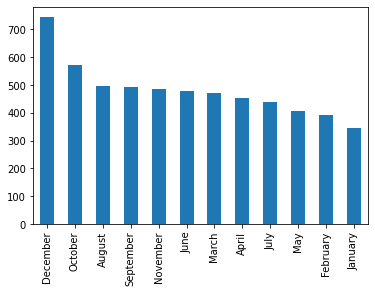

In [6]:
# convert release date column to datetime values
tn_movie['release_date'] = pd.to_datetime(tn_movie['release_date'])
# create release month column
tn_movie['release_month'] = tn_movie['release_date'].dt.strftime('%B')
# plotting graph for release month
tn_movie['release_month'].value_counts().plot(kind='bar')

In [7]:
#exploring bom.movie_gross data
bom_movie = pd.read_csv("/home/ict/python/moringa/projects/Phase1-project/data/bom.movie_gross.csv")
bom_movie

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.00,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.00,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.00,664300000,2010
3,Inception,WB,292600000.00,535700000,2010
4,Shrek Forever After,P/DW,238700000.00,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.00,NaN,2018
3383,Edward II (2018 re-release),FM,4800.00,NaN,2018
3384,El Pacto,Sony,2500.00,NaN,2018
3385,The Swan,Synergetic,2400.00,NaN,2018


In [8]:
bom_movie['domestic_gross'].describe()

count        3359.00
mean     28745845.07
std      66982498.24
min           100.00
25%        120000.00
50%       1400000.00
75%      27900000.00
max     936700000.00
Name: domestic_gross, dtype: float64

In [9]:
# converting string integr and then get descriptive statistics
a = bom_movie['foreign_gross'].dropna().reset_index()
a['foreign_gross'] = pd.to_numeric(a['foreign_gross'], errors='coerce')
a['foreign_gross'].describe()

count        2032.00
mean     75057041.63
std     137529351.20
min           600.00
25%       3775000.00
50%      18900000.00
75%      75050000.00
max     960500000.00
Name: foreign_gross, dtype: float64

##### I was curious about how the studio impacted the number of watch.

In [10]:
bom_movie_studio = bom_movie['studio'].value_counts().head(10)
bom_movie_studio

IFC      166
Uni.     147
WB       140
Fox      136
Magn.    136
SPC      123
Sony     110
BV       106
LGF      103
Par.     101
Name: studio, dtype: int64

<AxesSubplot:>

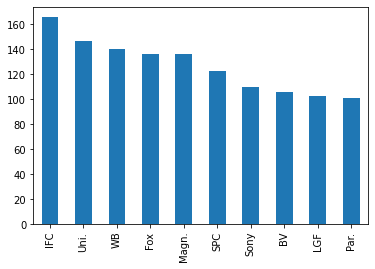

In [11]:
# plotting studio 
bom_movie['studio'].value_counts().head(10).plot(kind = 'bar')

In [23]:
bom_movie['year'].value_counts().head(10)

2015    450
2016    436
2012    400
2011    399
2014    395
2013    350
2010    328
2017    321
2018    308
Name: year, dtype: int64

In [24]:
rt_reviews = pd.read_csv('/home/ict/python/moringa/projects/Phase1-project/data/rt.movie_info.tsv', sep='\t')
rt_reviews.head(3)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN


#### I wanted to know whether rating impacted the watching.

In [25]:
rt_reviews['rating'].value_counts()

R        521
NR       503
PG       240
PG-13    235
G         57
NC17       1
Name: rating, dtype: int64

<AxesSubplot:>

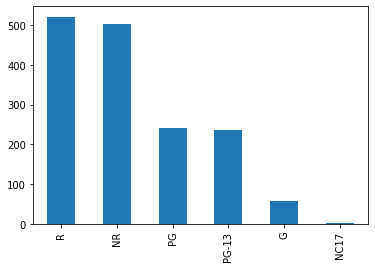

In [26]:
rt_reviews['rating'].value_counts().plot(kind = 'bar')

##### I was also curious and checked whether runtime minutes affected the watch

In [27]:
rt_reviews['runtime'].value_counts().head(30)

90 minutes     72
95 minutes     66
100 minutes    51
93 minutes     47
96 minutes     43
98 minutes     41
91 minutes     40
92 minutes     38
94 minutes     37
105 minutes    36
89 minutes     36
110 minutes    35
104 minutes    35
120 minutes    33
108 minutes    33
85 minutes     32
97 minutes     29
101 minutes    28
99 minutes     28
114 minutes    27
88 minutes     27
103 minutes    26
111 minutes    26
115 minutes    25
102 minutes    25
107 minutes    24
86 minutes     23
106 minutes    23
109 minutes    22
80 minutes     21
Name: runtime, dtype: int64

##### I was curious about how the studio impacted the number of watch.

<AxesSubplot:>

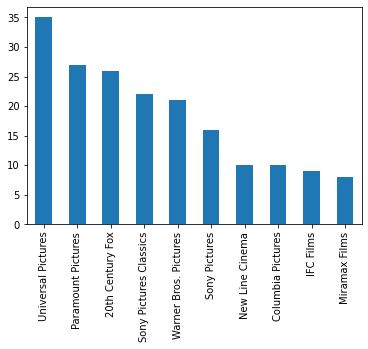

In [53]:
rt_reviews['studio'].value_counts().head(10).plot(kind = 'bar')

##### I was curious about how the studio impacted the number of watch.

In [62]:
rt_reviews['genre'].value_counts()

Drama                                                                                     151
Comedy                                                                                    110
Comedy|Drama                                                                               80
Drama|Mystery and Suspense                                                                 67
Art House and International|Drama                                                          62
                                                                                         ... 
Art House and International|Drama|Sports and Fitness                                        1
Comedy|Documentary|Musical and Performing Arts|Special Interest                             1
Comedy|Cult Movies|Mystery and Suspense|Science Fiction and Fantasy                         1
Action and Adventure|Art House and International|Mystery and Suspense|Special Interest      1
Comedy|Drama|Kids and Family|Sports and Fitness             

<AxesSubplot:>

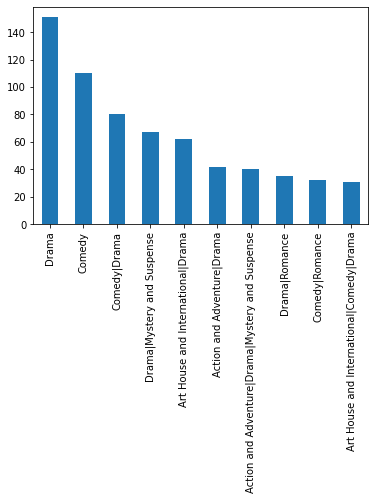

In [54]:
genre_count.head(10).plot(kind = 'bar')

In [31]:
tmdb_review = pd.read_csv('/home/ict/python/moringa/projects/Phase1-project/data/tmdb.movies.csv', )
tmdb_review.sample(10)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
22866,22866,[27],487472,en,Whisper,0.68,2017-10-31,Whisper,6.00,2
3231,3231,"[99, 10402]",79201,en,God Bless Ozzy Osbourne,2.83,2011-04-24,God Bless Ozzy Osbourne,7.00,13
21820,21820,[28],455252,en,King Arthur and the Knights of the Round Table,2.11,2017-05-02,King Arthur and the Knights of the Round Table,3.10,8
23464,23464,[27],540957,en,The Armoire,0.60,2017-07-01,The Armoire,6.50,2
11755,11755,"[28, 18]",257447,en,Tapped Out,3.73,2014-05-27,Tapped Out,5.80,34
8384,8384,[18],179109,fr,Les salauds,5.42,2013-10-06,Bastards,5.90,49
6528,6528,[],135698,en,Tyler Perry's I Don't Want to Do Wrong - The Play,1.11,2012-10-23,Tyler Perry's I Don't Want to Do Wrong - The Play,8.50,4
16447,16447,[35],318974,en,Ari Shaffir: Paid Regular,0.63,2015-01-13,Ari Shaffir: Paid Regular,7.00,1
23035,23035,"[99, 36, 10770]",580698,en,High Tech Airport,0.64,2017-01-01,High Tech Airport,10.00,1
13914,13914,[],302685,en,Abducted by Aliens: UFO Encounters of the 4th ...,0.60,2014-01-14,Abducted by Aliens: UFO Encounters of the 4th ...,5.00,1


In [32]:
tmdb_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


I was curious and wanted to know genre id representation and went further to fetch all the information needed.
Here is the representation.
 * MOVIE
 * Action          28
 * Adventure       12
 * Animation       16
 * Comedy          35
 * Crime           80
 * Documentary     99
 * Drama           18
 * Family          10751
 * Fantasy         14
 * History         36
 * Horror          27
 * Music           10402
 * Mystery         9648
 * Romance         10749
 * Science Fiction 878
 * TV Movie        10770
 * Thriller        53
 * War             10752
 * Western         37

In [39]:
import ast

# convert the genre_ids column to list of integers
tmdb_review['genre_ids'] = tmdb_review['genre_ids'].apply(lambda x: ast.literal_eval(x) if x != '[]' else [])

# explode the genre_ids column
tmdb_review = tmdb_review.explode('genre_ids')

# count the number of occurrences of each genre id
genre_counts = tmdb_review['genre_ids'].value_counts()

print(genre_counts)

18       8303
35       5652
99       4965
53       4207
27       3683
28       2612
10749    2321
878      1762
10751    1565
80       1515
16       1486
12       1400
10402    1267
9648     1237
14       1139
10770    1084
36        622
10752     330
37        205
Name: genre_ids, dtype: int64


##### From the the above value count i was curious to see visualization on how genre performed.

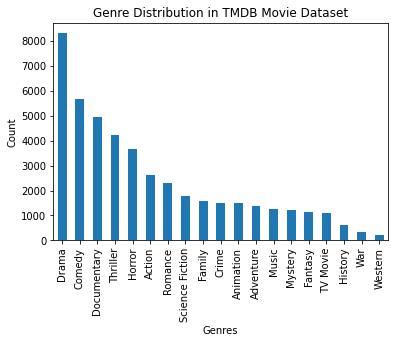

In [41]:
# define a dictionary to map genre IDs to names
genre_dict = {
    28: "Action",
    12: "Adventure",
    16: "Animation",
    35: "Comedy",
    80: "Crime",
    99: "Documentary",
    18: "Drama",
    10751: "Family",
    14: "Fantasy",
    36: "History",
    27: "Horror",
    10402: "Music",
    9648: "Mystery",
    10749: "Romance",
    878: "Science Fiction",
    10770: "TV Movie",
    53: "Thriller",
    10752: "War",
    37: "Western"
}

# create a Series with the count of each genre
genre_counts = pd.Series({
    genre_dict[k]: v for k, v in genre_counts.items()
})

# plot the bar chart
genre_counts.plot(kind="bar")
plt.xticks(rotation=90)
plt.xlabel("Genres")
plt.ylabel("Count")
plt.title("Genre Distribution in TMDB Movie Dataset")
plt.show()


#####  I grouped release date the the months to see how it affected the watch.

<AxesSubplot:>

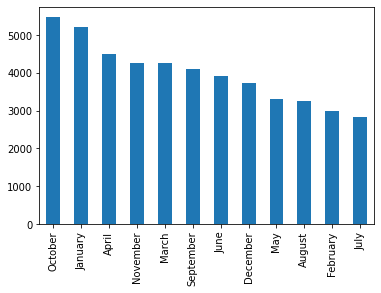

In [88]:
# convert release date column to datetime values
tmdb_review['release_date'] = pd.to_datetime(tmdb_review['release_date'])
# create release month column
tmdb_review['release_month'] = tmdb_review['release_date'].dt.strftime('%B')
tmdb_review['release_month'].value_counts().plot(kind='bar')

In [35]:
tmdb_review['release_month'].value_counts().head(30)

January      3132
October      3035
April        2566
March        2406
November     2338
September    2264
June         2166
December     1929
May          1865
August       1698
February     1614
July         1504
Name: release_month, dtype: int64

In [42]:
im_movies = sqlite3.connect('/home/ict/python/moringa/projects/Phase1-project/data/im.db')

In [43]:
cursor = im_movies.cursor()

#execute the query to retrieve table names
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

#fetch the results and print them out
tables = cursor.fetchall()
print(tables)

[('movie_basics',), ('directors',), ('known_for',), ('movie_akas',), ('movie_ratings',), ('persons',), ('principals',), ('writers',)]


In [60]:
IM_movies_review = pd.read_sql("""
SELECT * 
FROM movie_basics
JOIN movie_ratings
    USING(movie_id);
""", im_movies)

In [61]:
IM_movies_review

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama",7.00,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama",7.20,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama,6.90,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.10,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy",6.50,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.00,Documentary,6.20,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.00,"Drama,Family",8.70,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.50,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.60,5


In [46]:
# IM_movies_review['runtime_minutes'].plot(kind = 'bar')
# plt.show()

In [47]:
IM_movies_review['runtime_minutes'].value_counts().head(30)

90.00     4742
80.00     2166
85.00     2057
100.00    1957
95.00     1933
93.00     1547
88.00     1487
92.00     1434
87.00     1381
94.00     1378
86.00     1352
75.00     1297
98.00     1284
91.00     1273
96.00     1266
82.00     1252
89.00     1247
97.00     1226
84.00     1208
105.00    1198
83.00     1155
110.00    1019
70.00      937
99.00      907
120.00     902
102.00     898
81.00      886
78.00      864
104.00     811
101.00     789
Name: runtime_minutes, dtype: int64

<AxesSubplot:>

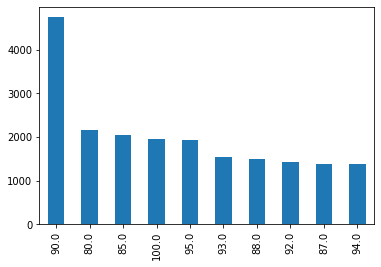

In [48]:
IM_movies_review['runtime_minutes'].value_counts().head(10).plot(kind = 'bar')

In [49]:
IM_movies_review['start_year'].value_counts()

2016    8721
2017    8713
2015    8494
2014    8371
2013    7990
2012    7680
2018    7526
2011    7389
2010    6792
2019    2180
Name: start_year, dtype: int64

<AxesSubplot:>

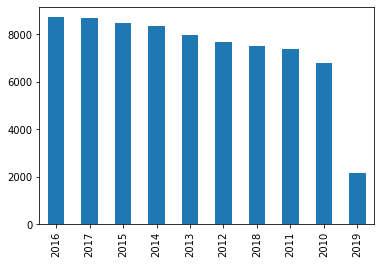

In [50]:
IM_movies_review['start_year'].value_counts().plot(kind = 'bar')

In [51]:
#count of every genre
IM_movies_review['genres'].value_counts().head(30)

Drama                            11612
Documentary                      10313
Comedy                            5613
Horror                            2692
Comedy,Drama                      2617
Thriller                          1555
Drama,Romance                     1510
Comedy,Romance                    1236
Comedy,Drama,Romance              1208
Horror,Thriller                   1004
Drama,Thriller                     990
Action                             979
Romance                            717
Biography,Documentary              694
Documentary,Drama                  582
Documentary,Music                  579
Comedy,Horror                      579
Action,Crime,Drama                 562
Crime,Drama,Thriller               504
Crime,Drama                        494
Family                             491
Biography,Documentary,History      479
Drama,Family                       478
Documentary,History                476
Action,Drama                       395
Horror,Mystery,Thriller  

<AxesSubplot:>

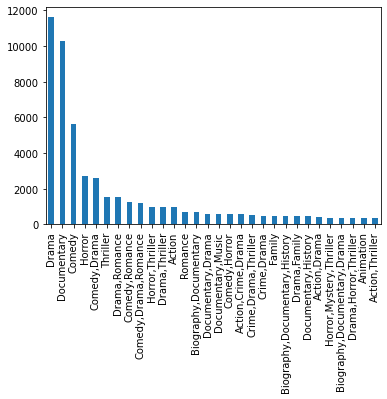

In [52]:
#how movies are watched based on genres
IM_movies_review['genres'].value_counts().head(30).plot(kind = 'bar')

In [66]:
merged_data = pd.merge(IM_movies_review,tmdb_review,how = 'outer')
merged_data.shape

(111286, 18)

In [67]:
merged_data

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,Unnamed: 0,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count,release_month
0,tt0063540,Sunghursh,Sunghursh,2013.00,175.00,"Action,Crime,Drama",7.00,77.00,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019.00,114.00,"Biography,Drama",7.20,43.00,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018.00,122.00,Drama,6.90,4517.00,24185.00,35,299782.00,en,9.80,2018-11-02,The Other Side of the Wind,7.00,64.00,November
3,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018.00,122.00,Drama,6.90,4517.00,24185.00,18,299782.00,en,9.80,2018-11-02,The Other Side of the Wind,7.00,64.00,November
4,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018.00,NaN,"Comedy,Drama",6.10,13.00,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111281,NaN,NaN,Jaws,NaN,NaN,NaN,NaN,NaN,26508.00,16,514492.00,en,0.60,2018-05-29,Jaws,0.00,1.00,May
111282,NaN,NaN,Laboratory Conditions,NaN,NaN,NaN,NaN,NaN,26512.00,27,488143.00,en,0.60,2018-10-13,Laboratory Conditions,0.00,1.00,October
111283,NaN,NaN,Laboratory Conditions,NaN,NaN,NaN,NaN,NaN,26512.00,18,488143.00,en,0.60,2018-10-13,Laboratory Conditions,0.00,1.00,October
111284,NaN,NaN,_EXHIBIT_84xxx_,NaN,NaN,NaN,NaN,NaN,26513.00,18,485975.00,en,0.60,2018-05-01,_EXHIBIT_84xxx_,0.00,1.00,May


In [68]:
merged_data.isnull().sum()

movie_id             19592
primary_title        19592
original_title           0
start_year           19592
runtime_minutes      27655
genres               20448
averagerating        19592
numvotes             19592
Unnamed: 0           58357
genre_ids            61033
id                   58357
original_language    58357
popularity           58357
release_date         58357
title                58357
vote_average         58357
vote_count           58357
release_month        58357
dtype: int64

In [70]:
merged_data.loc[merged_data.duplicated(subset=['title'])].head(4)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,Unnamed: 0,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count,release_month
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019.00,114.00,"Biography,Drama",7.20,43.00,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
3,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018.00,122.00,Drama,6.90,4517.00,24185.00,18,299782.00,en,9.80,2018-11-02,The Other Side of the Wind,7.00,64.00,November
4,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018.00,NaN,"Comedy,Drama",6.10,13.00,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
5,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017.00,80.00,"Comedy,Drama,Fantasy",6.50,119.00,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN


## Data plotting for visualization

##### Genre plotting

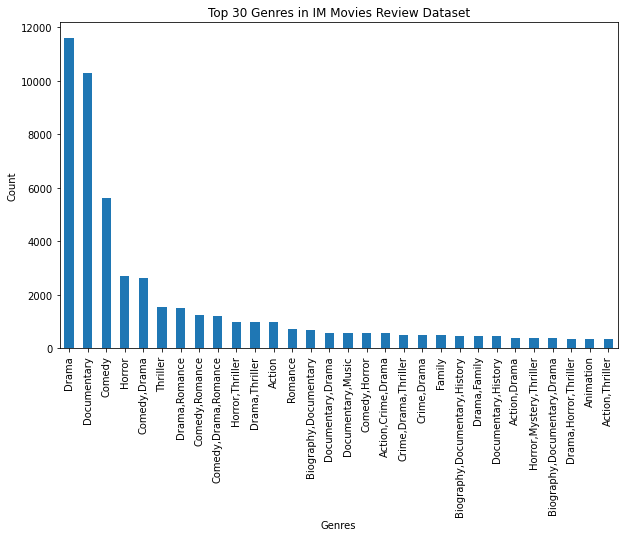

In [76]:
# set figure size
plt.figure(figsize=(10, 6))

# plot bar chart
IM_movies_review['genres'].value_counts().head(30).plot(kind='bar')

# set x and y labels and title
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Top 30 Genres in IM Movies Review Dataset')

# show the plot
plt.show()

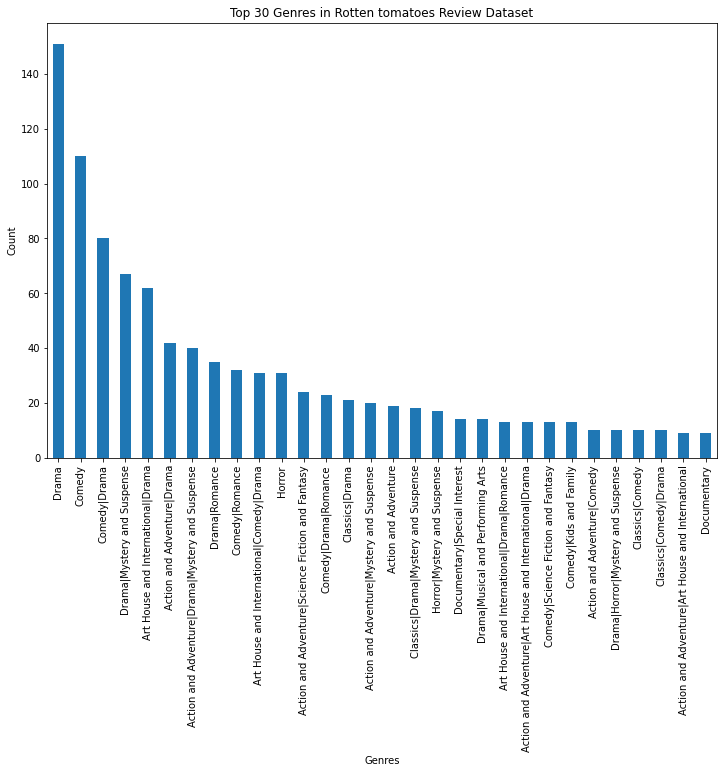

In [79]:
# set figure size
plt.figure(figsize=(12, 8))

# plot bar chart
rt_reviews['genre'].value_counts().head(30).plot(kind='bar')

# set x and y labels and title
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Top 30 Genres in Rotten tomatoes Review Dataset')

# show the plot
plt.show()

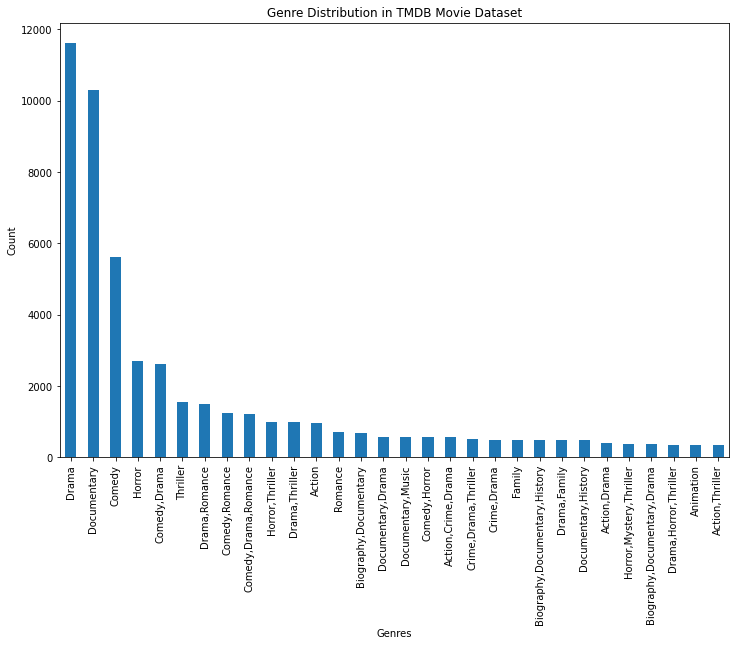

In [83]:
# set figure size
plt.figure(figsize=(12, 8))


# plot the bar chart
genre_counts.plot(kind="bar")
plt.xticks(rotation=90)
plt.xlabel("Genres")
plt.ylabel("Count")
plt.title("Genre Distribution in TMDB Movie Dataset")
plt.show()


#### Plotting Release months for better visualization

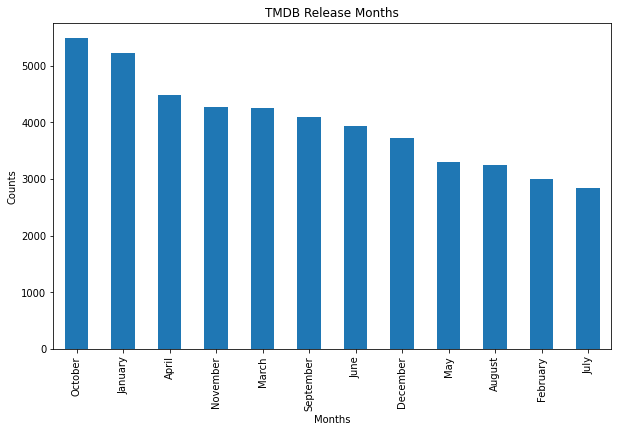

In [87]:
plt.figure(figsize=(10,6))

# ploting the bar chart
tmdb_review['release_month'].value_counts().head(30).plot(kind = 'bar')
plt.xlabel('Months')
plt.ylabel('Counts')
plt.title('TMDB Release Months')
plt.show()

In this dataset, movie release months were fairly evenly distributed throughout the year, with the most releases in October and the least in July.


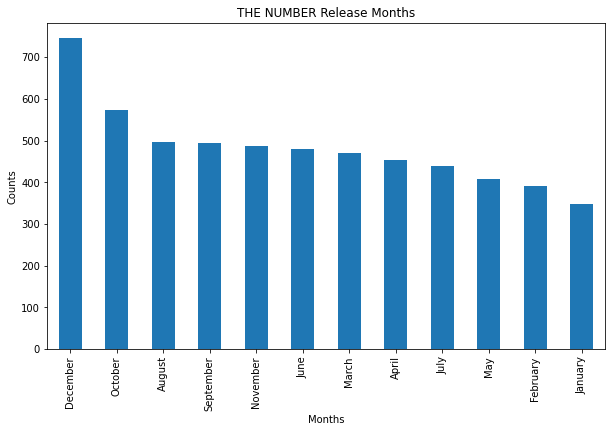

In [90]:
plt.figure(figsize=(10,6))
# ploting the bar chart
tn_movie['release_month'].value_counts().plot(kind='bar')
plt.xlabel('Months')
plt.ylabel('Counts')
plt.title('THE NUMBER Release Months')
plt.show()

In this dataset, movie release months were fairly evenly distributed throughout the year, with the most releases in December and the least in January.

#### Data visualization on studio
I wanted to see which studio has the most watch.

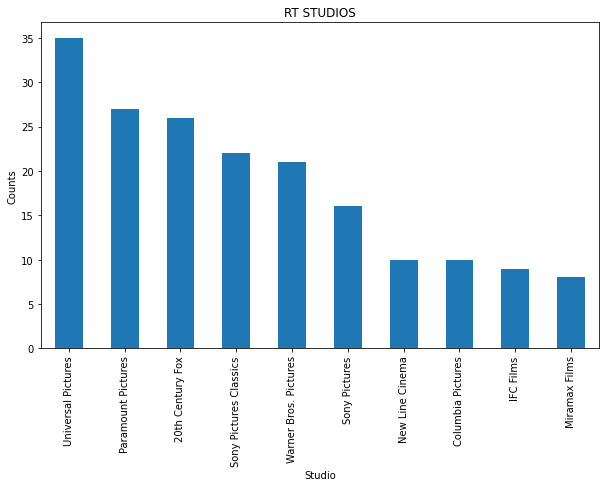

In [91]:
plt.figure(figsize=(10,6))

# ploting the bar chart
rt_reviews['studio'].value_counts().head(10).plot(kind = 'bar')
plt.xlabel('Studio')
plt.ylabel('Counts')
plt.title('RT STUDIOS')
plt.show()

In this dataset Universal picture was the most studio that produced the best performing movies

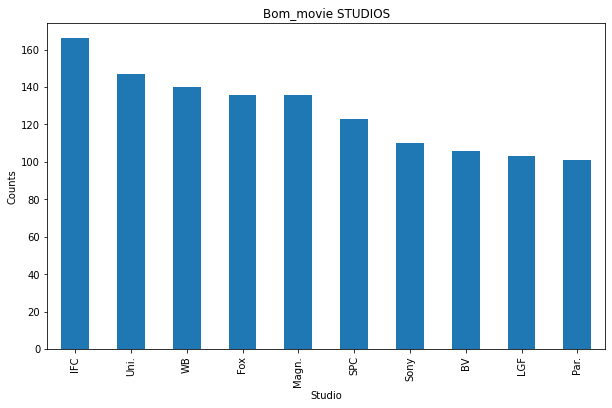

In [92]:
plt.figure(figsize=(10,6))

# ploting the bar chart
bom_movie['studio'].value_counts().head(10).plot(kind = 'bar')
plt.xlabel('Studio')
plt.ylabel('Counts')
plt.title('Bom_movie STUDIOS')
plt.show()

## Recommendations

#### Release Month Recommendations

From my findings above, the following is my recommendations regarding release month.

 1. Release movie between August and December for the the highest sale/watch
 2. Release movie on January it has the second biggest wave of sale/watch.

#### Genre
from the above analysis, all three datasets have one thing in common. Drama performed best than all other genres. Followed by comedy then documentaries. These are the areas to focus more on for the new studio to have a competitive grounds to compete with the existing ones.

#### Runtime 
From all the above analysis in all datasets, its true and evident that 90 minutes are most preferred from the rest. As an analyst i would recommend taht the new upcoming microsoft studio to embark on 90 minutes timed movies for it to thrive and make good profit 

#### Studio Recommendations.
From the above data analysis I  would recommend that our major concentration should be on Universal pictures, followed by 20th century fox.

### Conclusions
From the above analysis I would highly recomend microsoft to use data to create the new studio with all insight provided which will grately hekp them theri new venture.